In [6]:
import cv2
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [5]:
def median_filter_1d(data, window_size):
    """
    Apply a centered 1D median filter to the input data.

    :param data: 1D array of data to be filtered
    :param window_size: Size of the median filter window (must be an odd number)
    :return: Filtered data
    """
    if window_size % 2 == 0:
        raise ValueError("Window size must be an odd number")
    
    half_window = window_size // 2
    data_length = len(data)
    filtered_data = np.zeros(data_length)

    for i in range(data_length):
        start_index = max(0, i - half_window)
        end_index = min(data_length, i + half_window + 1)
        filtered_data[i] = np.median(data[start_index:end_index])

    return filtered_data

In [3]:
src_img_dir = r'f:\plovarna\stream_videos\20240701100000'
# Find all .png files in the directory
png_files = glob.glob(os.path.join(src_img_dir, '*.png'))
png_files[:5]

['f:\\plovarna\\stream_videos\\20240701100000\\webcam_stream_20240701100000_0001.png',
 'f:\\plovarna\\stream_videos\\20240701100000\\webcam_stream_20240701100000_0002.png',
 'f:\\plovarna\\stream_videos\\20240701100000\\webcam_stream_20240701100000_0003.png',
 'f:\\plovarna\\stream_videos\\20240701100000\\webcam_stream_20240701100000_0004.png',
 'f:\\plovarna\\stream_videos\\20240701100000\\webcam_stream_20240701100000_0005.png']

In [13]:
# Sort the files by name
png_files.sort(key=os.path.getmtime)
# Print sorted list of .png files
dif_lst = [-999]
for i,file in enumerate(png_files):
    if i > 0:
        frameA = cv2.imread(png_files[i-1])
        frameB = cv2.imread(png_files[i])
        dif_mean = np.mean(frameB-frameA)
        dif_lst.append(dif_mean)
dif_lst[0]=dif_lst[1]
dif_lst = np.array(dif_lst)

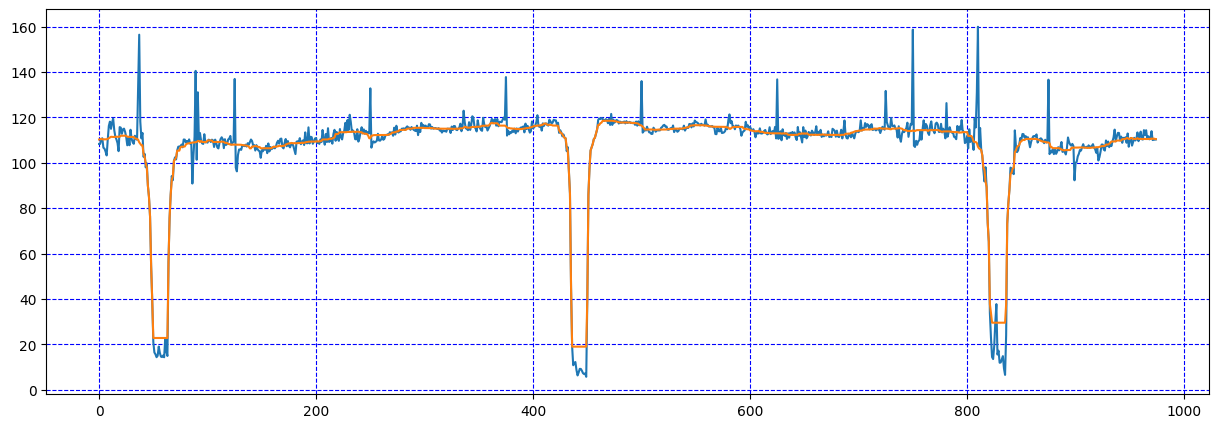

In [14]:
dif_lst_flt = median_filter_1d(dif_lst,27)
plt.figure(figsize=(15,5))
plt.plot(dif_lst)
plt.plot(dif_lst_flt)
plt.grid(which='both', color='b', linestyle='--',axis='both')
plt.show()

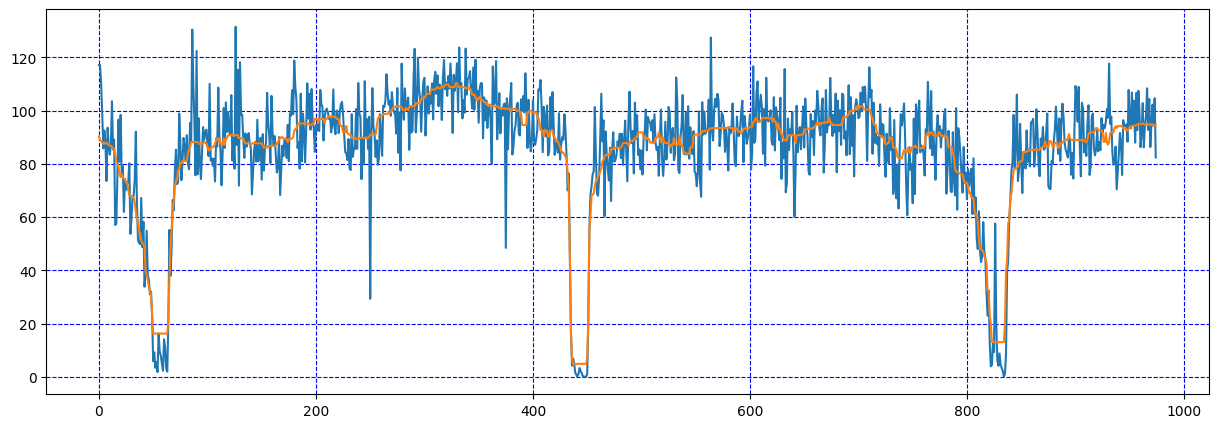

In [12]:
dif_lst_flt = median_filter_1d(dif_lst,27)
plt.figure(figsize=(15,5))
plt.plot(dif_lst)
plt.plot(dif_lst_flt)
plt.grid(which='both', color='b', linestyle='--',axis='both')
plt.show()